# Airbnb Superhosts analysis

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [10]:
seattle_listings = pd.read_csv("seattle/listings.csv")
boston_listings = pd.read_csv("boston/listings.csv")

In [11]:
seattle_superhosts = seattle_listings[seattle_listings["host_is_superhost"] == "t"]
boston_superhosts = boston_listings[boston_listings["host_is_superhost"] == "t"]

In [15]:
seattle_superhosts = seattle_superhosts.drop_duplicates(subset=["host_id"])
boston_superhosts = boston_superhosts.drop_duplicates(subset=["host_id"])

In [18]:
len(seattle_superhosts.columns)

92

In [19]:
len(boston_superhosts.columns)

95

In [92]:
for col in boston_superhosts.columns:
    if col not in seattle_superhosts.columns:
        print(col)

access
interaction
house_rules


In [96]:
boston_superhosts = boston_superhosts.drop(columns=["access", "interaction", "house_rules"])

In [97]:
complete = seattle_superhosts.append(boston_superhosts)

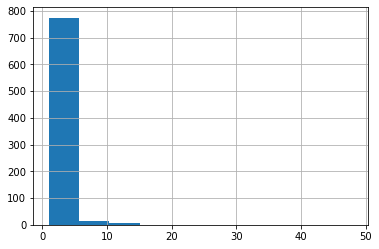

In [106]:
complete["host_total_listings_count"].hist()

In [99]:
complete.shape

(794, 92)

In [128]:
complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
10,175576,https://www.airbnb.com/rooms/175576,20160104002432,2016-01-04,Private Apartment - Queen Anne Hill,Queen Anne Hill is a charming neighborhood wit...,Be close to everything! Queen Anne Hill is a ...,Queen Anne Hill is a charming neighborhood wit...,none,Queen Anne Hill is a wonderful and historic ar...,...,10.0,f,NaN,WASHINGTON,f,moderate,t,f,1,3.33
12,3883392,https://www.airbnb.com/rooms/3883392,20160104002432,2016-01-04,Open Plan 2bdr/1bath in Queen Anne,Spacious apt in popular Seattle neighborhood. ...,This apartment is in a quiet and friendly city...,Spacious apt in popular Seattle neighborhood. ...,none,This neighborhood is one of Seattle's popular ...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,12233830,https://www.airbnb.com/rooms/12233830,20160906204935,2016-09-07,Modern Boston 2+ Bdrm Harvard/BU,"Just finished renovation: sun-filled, spacious...",- For one night stay requests or two nights on...,"Just finished renovation: sun-filled, spacious...",none,- The building is located in Union Village of ...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,6.16
3405,4598026,https://www.airbnb.com/rooms/4598026,20160906204935,2016-09-07,"Very Central, Safe and Quiet",Want to stay at a large and bright room? I off...,NaN,Want to stay at a large and bright room? I off...,none,"The neighborhood is full of life, yet safe and...",...,10.0,f,NaN,NaN,f,strict,f,f,1,0.93
3449,5889190,https://www.airbnb.com/rooms/5889190,20160906204935,2016-09-07,"Sunny, Safe, Spacious Room Near T!","Private room in an apartment close to BU, BC, ...",The private room provides great natural light ...,"Private room in an apartment close to BU, BC, ...",none,"Allston provides many great restaurants, cafes...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,4.87
3496,7277653,https://www.airbnb.com/rooms/7277653,20160906204935,2016-09-07,Private room near HBS & Harvard Sq!,"Enjoy your own private room with queen bed, ni...",We live in an area right outside Harvard campu...,"Enjoy your own private room with queen bed, ni...",none,"Our neighborhood is in a quiet, low-key sectio...",...,9.0,f,NaN,NaN,f,flexible,f,f,1,4.31


In [129]:
test = complete.groupby('host_total_listings_count').count().reset_index()

In [173]:
test["listing_url"].sum()

794

In [174]:
test

,# listings owned by host,# superhosts,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1.0,557,557,557,557,557,543,517,557,557,...,552,557,0,396,557,557,557,557,557,552
1,2.0,148,148,148,148,148,142,138,148,148,...,142,148,0,88,148,148,148,148,148,142
2,3.0,41,41,41,41,41,39,35,41,41,...,35,41,0,27,41,41,41,41,41,35
3,4.0,18,18,18,18,18,18,17,18,18,...,18,18,0,14,18,18,18,18,18,18
4,5.0,10,10,10,10,10,9,10,10,10,...,9,10,0,7,10,10,10,10,10,9
5,6.0,6,6,6,6,6,6,6,6,6,...,6,6,0,1,6,6,6,6,6,6
6,7.0,4,4,4,4,4,4,4,4,4,...,4,4,0,1,4,4,4,4,4,4
7,8.0,2,2,2,2,2,2,0,2,2,...,2,2,0,0,2,2,2,2,2,2
8,10.0,2,2,2,2,2,2,2,2,2,...,2,2,0,1,2,2,2,2,2,2
9,12.0,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1


In [158]:
test.columns

Index(['host_total_listings_count', 'id', 'listing_url', 'scrape_id',
       'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [165]:
test = test.rename(columns={
    '# listing owned by host': "# listings owned by host",
    'id': '# superhosts'
})

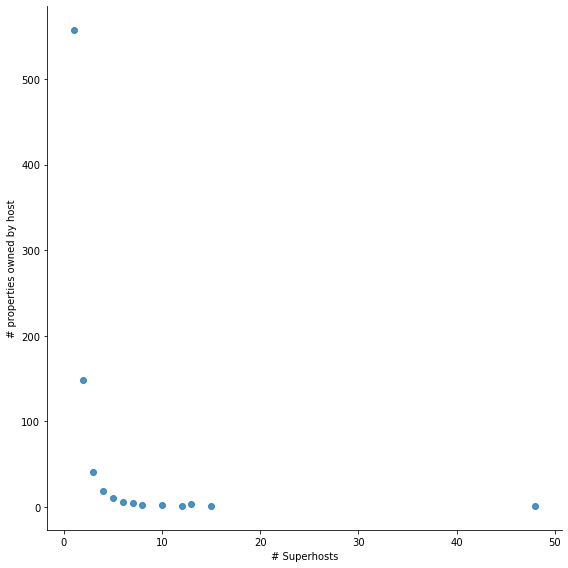

In [255]:
ax = sns.lmplot(x='# listings owned by host', y='# superhosts', data=test, fit_reg=False, size = 8)
ax.set(xlabel='# Superhosts', ylabel='# properties owned by host')
ax.savefig("propertiesOwned.png")

# Most common property type of superhosts

In [176]:
complete.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [202]:
grouped_by_property_type = complete.groupby('property_type').count().reset_index().sort_values(by="id", ascending = False)

In [203]:
grouped_by_property_type

,property_type,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Apartment,366,366,366,366,366,357,328,366,366,...,358,366,0,207,366,366,366,366,366,358
7,House,335,335,335,335,335,323,318,335,335,...,327,335,0,277,335,335,335,335,335,327
6,Condominium,25,25,25,25,25,25,22,25,25,...,24,25,0,7,25,25,25,25,25,24
10,Townhouse,21,21,21,21,21,21,20,21,21,...,20,21,0,13,21,21,21,21,21,20
8,Loft,15,15,15,15,15,14,13,15,15,...,15,15,0,9,15,15,15,15,15,15
4,Cabin,12,12,12,12,12,12,11,12,12,...,12,12,0,12,12,12,12,12,12,12
1,Bed & Breakfast,11,11,11,11,11,11,11,11,11,...,11,11,0,5,11,11,11,11,11,11
5,Camper/RV,2,2,2,2,2,1,2,2,2,...,2,2,0,2,2,2,2,2,2,2
9,Other,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,2,2,2
2,Boat,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1


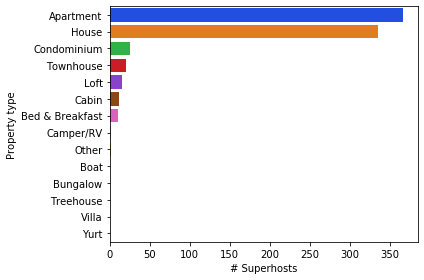

In [217]:
bar_plot = sns.barplot(x="id", y="property_type", data=grouped_by_property_type, orient = "h", color = "b", palette = "bright")
bar_plot.set(xlabel='# Superhosts', ylabel='Property type')
bar_plot.figure.tight_layout()
bar_plot.figure.savefig("propertyTypes.png")

In [197]:
complete['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [224]:
grouped_by_room_type = complete.groupby('room_type').count().reset_index().sort_values(by="id", ascending = False)

In [225]:
grouped_by_room_type

,room_type,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Entire home/apt,492,492,492,492,492,476,459,492,492,...,480,492,0,353,492,492,492,492,492,480
1,Private room,288,288,288,288,288,281,262,288,288,...,284,288,0,175,288,288,288,288,288,284
2,Shared room,14,14,14,14,14,14,11,14,14,...,12,14,0,9,14,14,14,14,14,12


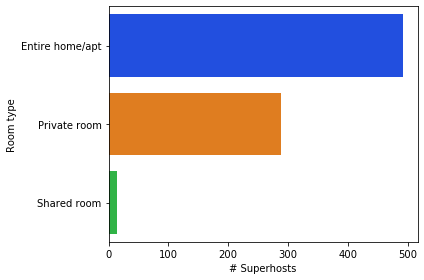

In [228]:
bar_plot = sns.barplot(x="id", y="room_type", data=grouped_by_room_type, orient = "h", color = "b", palette = "bright")
bar_plot.set(xlabel='# Superhosts', ylabel='Room type')
bar_plot.figure.tight_layout()
bar_plot.figure.savefig("roomTypes.png")

## Host response time

In [232]:
complete['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day', nan,
       'a few days or more'], dtype=object)

In [241]:
grouped_by_response_time = complete.groupby('host_response_time').count().reset_index().sort_values(by = "id", ascending = False)

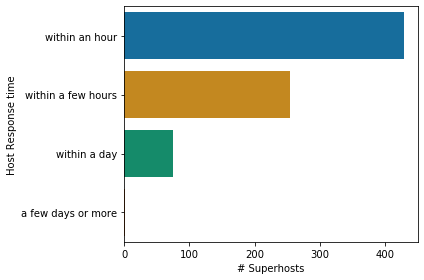

In [249]:
bar_plot = sns.barplot(x="id", y="host_response_time", data=grouped_by_response_time, orient = "h", color = "g", palette = "colorblind")
bar_plot.set(xlabel='# Superhosts', ylabel='Host Response time')
bar_plot.figure.tight_layout()
bar_plot.figure.savefig("responseTimes.png")

In [248]:
grouped_by_response_time

,host_response_time,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,within an hour,429,429,429,429,429,417,403,429,429,...,422,429,0,303,429,429,429,429,429,422
2,within a few hours,254,254,254,254,254,245,228,254,254,...,249,254,0,154,254,254,254,254,254,249
1,within a day,74,74,74,74,74,72,65,74,74,...,69,74,0,48,74,74,74,74,74,69
0,a few days or more,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
